In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1
df_global_rpc = pd.read_excel(r"C:\Users\nlazareva\Downloads\CASO PRÁCTICO 2\df_global_rpc.xlsx")
df_global_rpc.head()

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad,Importe,Dif_env_comp,...,Ciudad,Estado,Código Postal,Región,Categoría,Sub-categoría,Nombre Producto,Coste Producción,Beneficio,Averagemonthlywage
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.960,2,523.920,3.208333,...,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,63.723687,4893
1,CA-2017-110198,2021-05-01,2021-05-02 00:00:00,First Class,AG-10900,FUR-BO-10001798,314.352,3,943.056,1.000000,...,Tucson,Arizona,85705.0,West,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,252.761531,4893
2,CA-2017-159793,2021-08-25,2021-08-29 00:00:00,Standard Class,SV-20365,FUR-BO-10001798,130.980,2,261.960,4.000000,...,Dover,Delaware,19901.0,East,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,-198.236313,4893
3,CA-2016-117681,2020-04-09,2020-04-14 00:00:00,Standard Class,HF-14995,FUR-BO-10001798,556.665,5,2783.325,5.000000,...,NaN,NaN,NaN,NaN,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,1632.834218,3478
4,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.940,3,2195.820,3.000000,...,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",563.102730,506.511811,4893


C:\Users\nlazareva\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


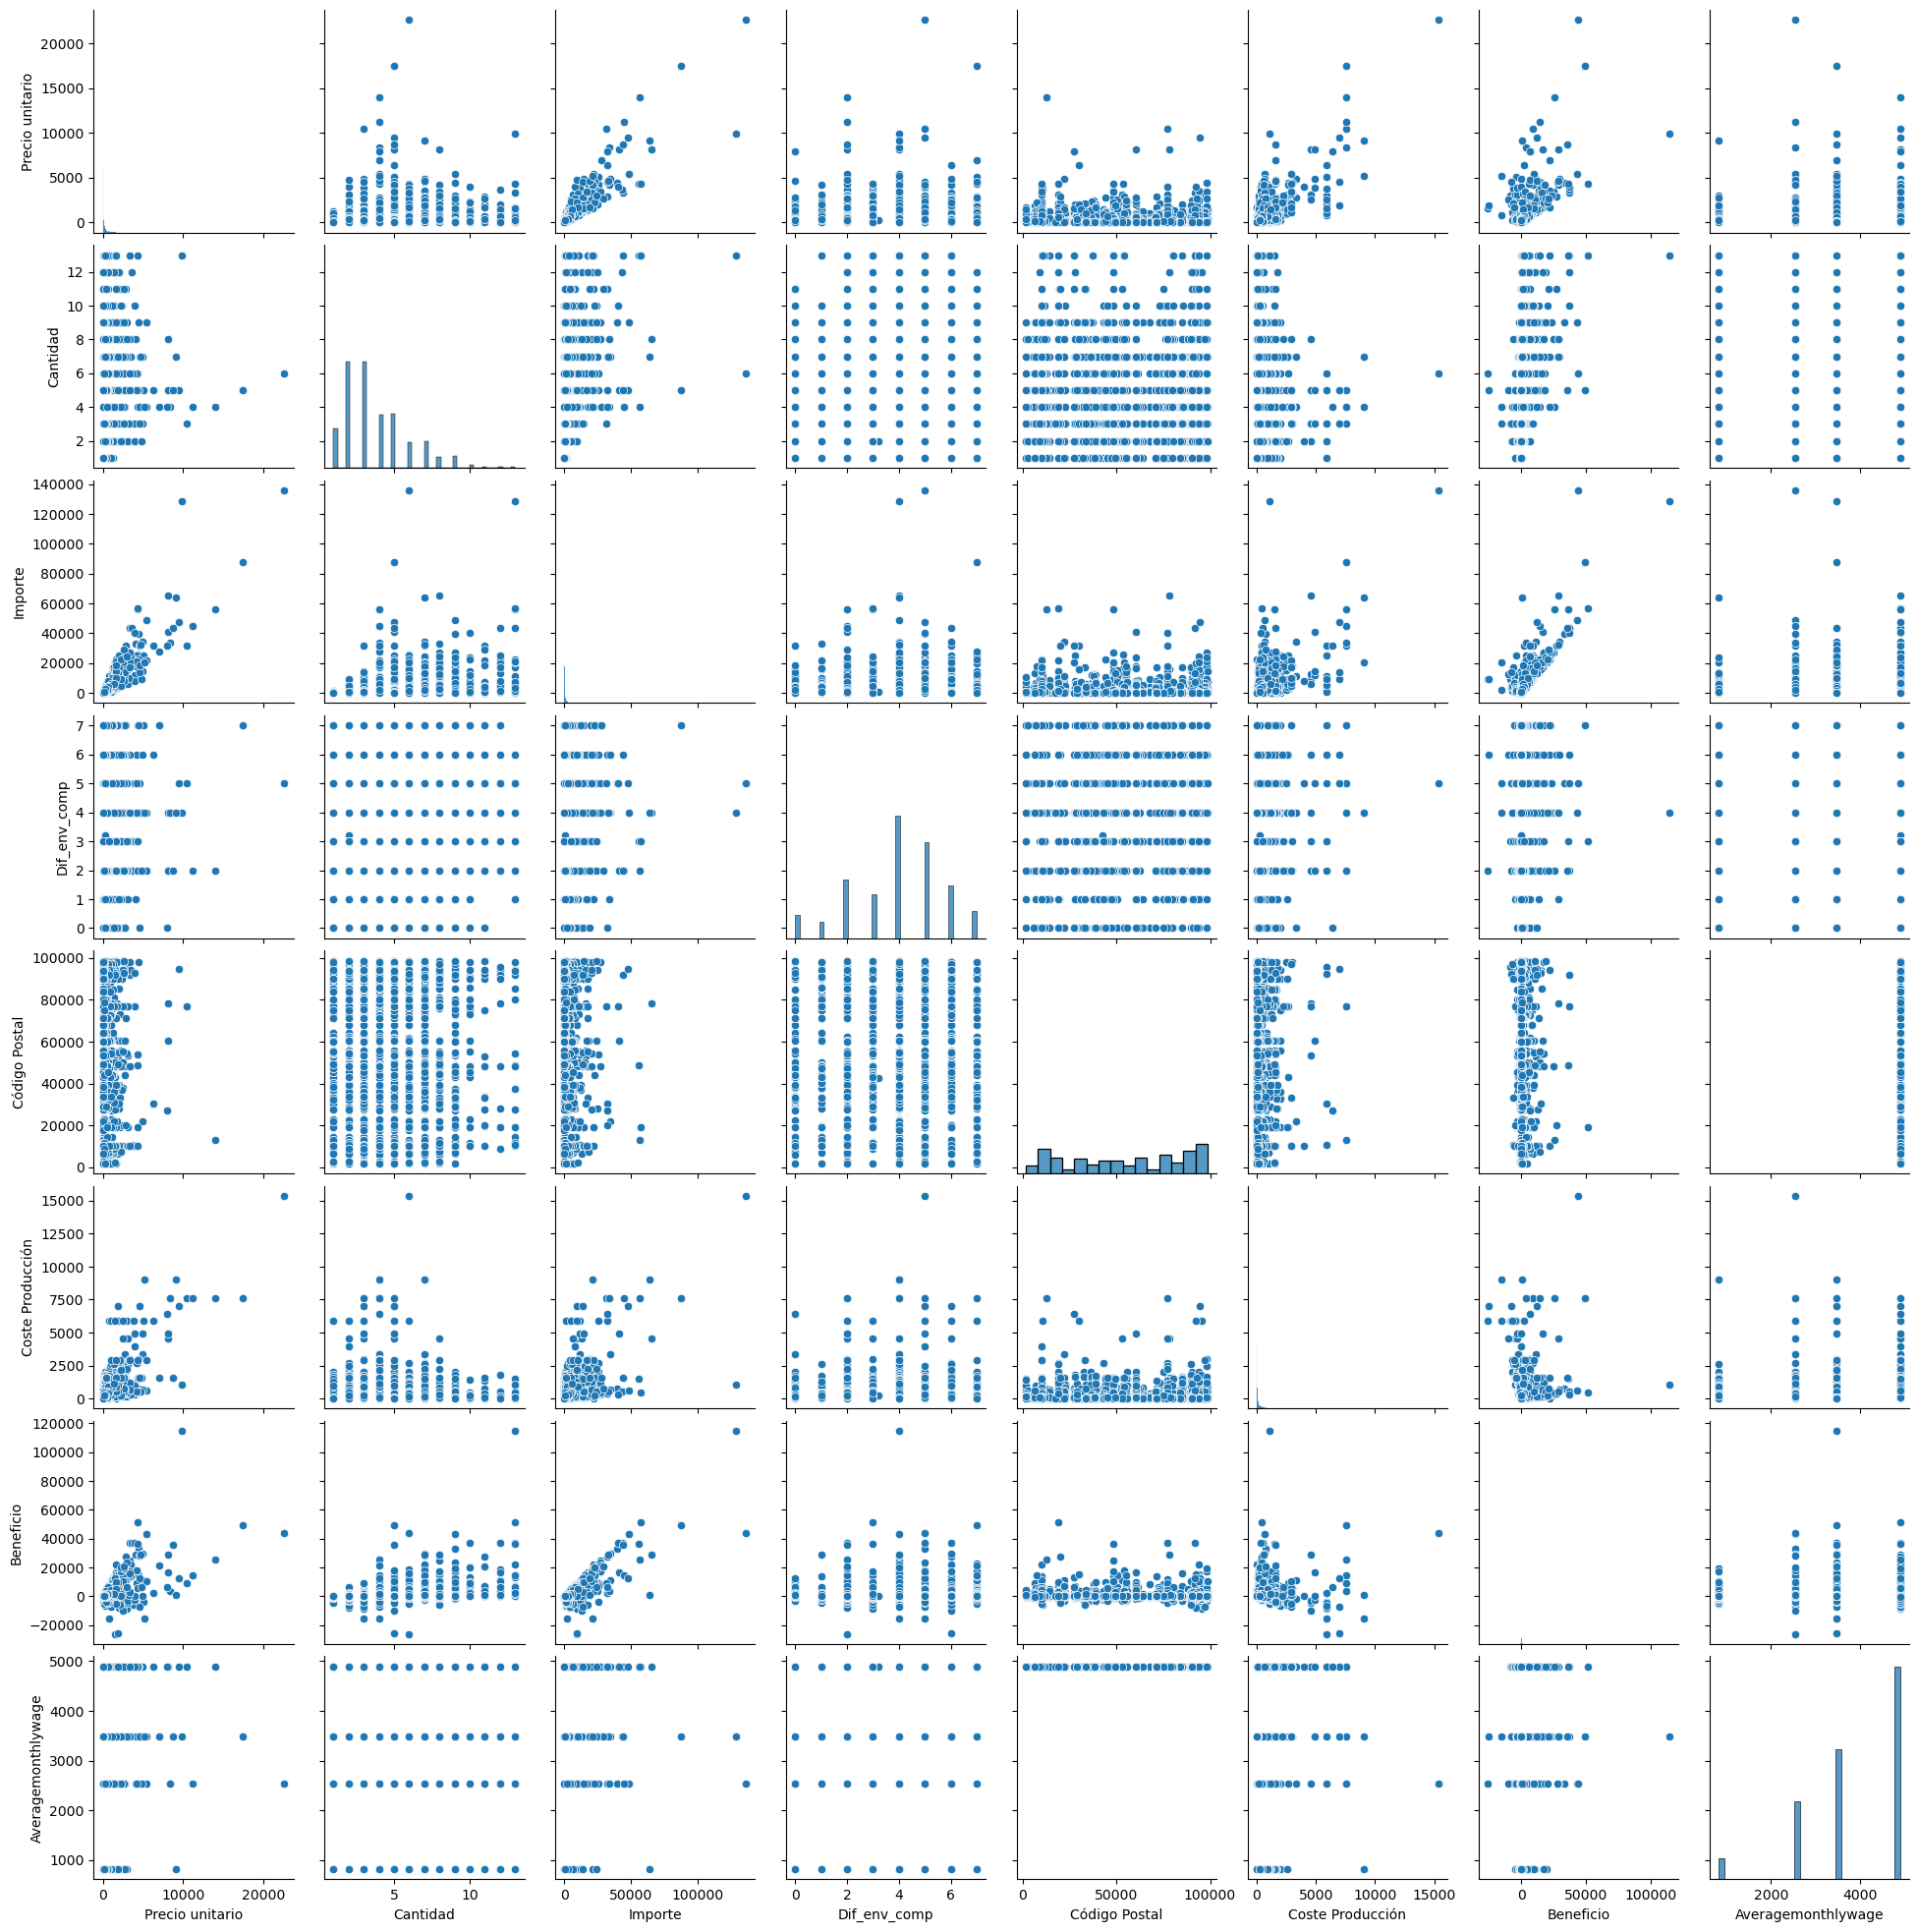

In [4]:
sns.pairplot(df_global_rpc)

In [ ]:
#

<Axes: xlabel='País'>

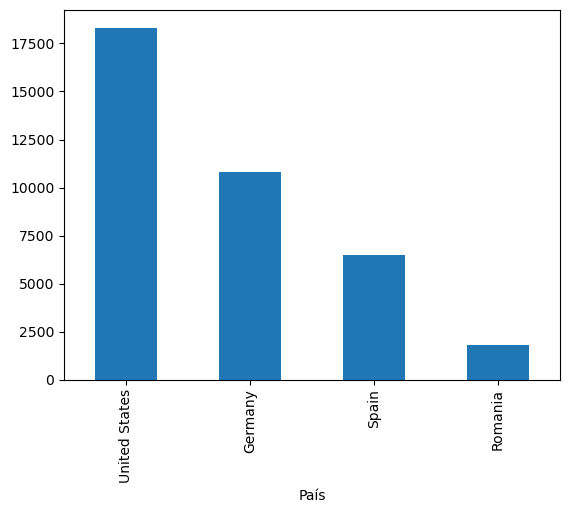

In [7]:
# 2
df_global_rpc.groupby(['País'])['Cantidad'].agg('sum').sort_values(ascending=False).plot(kind='bar') 
# EEUU tiene mayor nº de ventas

<Axes: xlabel='Fecha compra'>

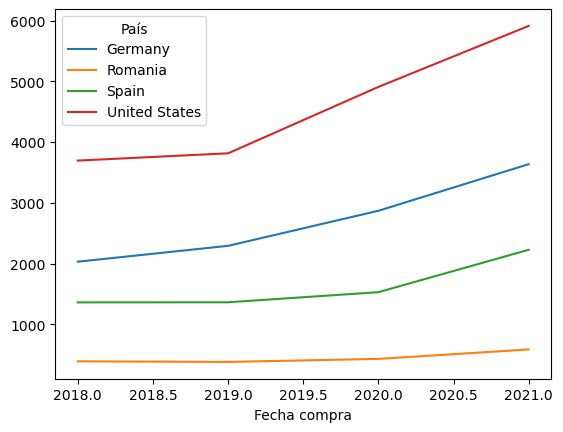

In [8]:
# 3
df_global_rpc.groupby(["País", df_global_rpc["Fecha compra"].map(lambda x: x.year)])['Cantidad'].agg('sum').unstack("País").plot()

<Axes: title={'center': 'Importe'}, xlabel='País'>

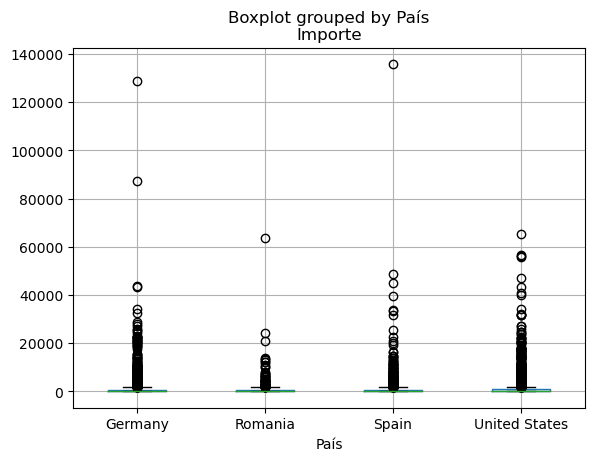

In [10]:
# 4
df_global_rpc.boxplot('Importe', by = 'País')

<Axes: title={'center': 'Importe'}, xlabel='País'>

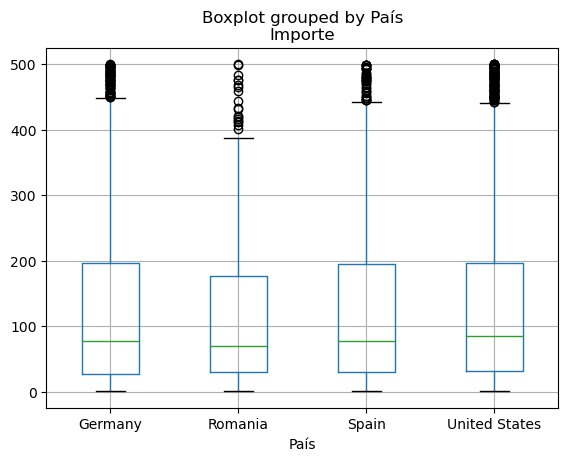

In [14]:
df_global_rpc[df_global_rpc['Importe'] < 500.00].boxplot('Importe', by='País')

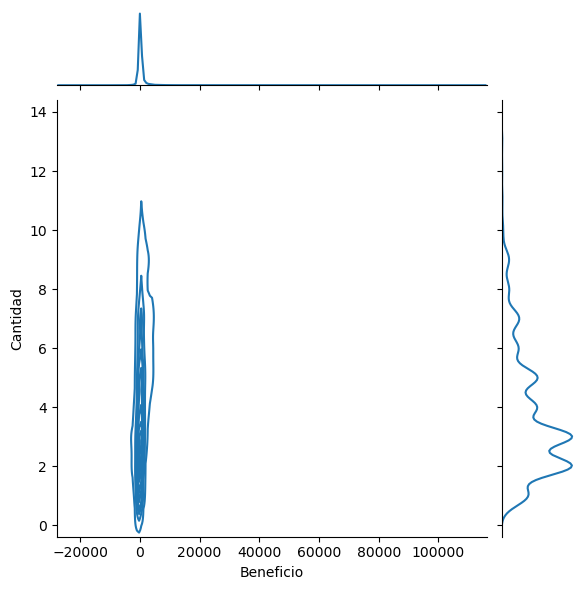

In [15]:
# 5
sns.jointplot(x='Beneficio', y='Cantidad', data=df_global_rpc, kind='kde')

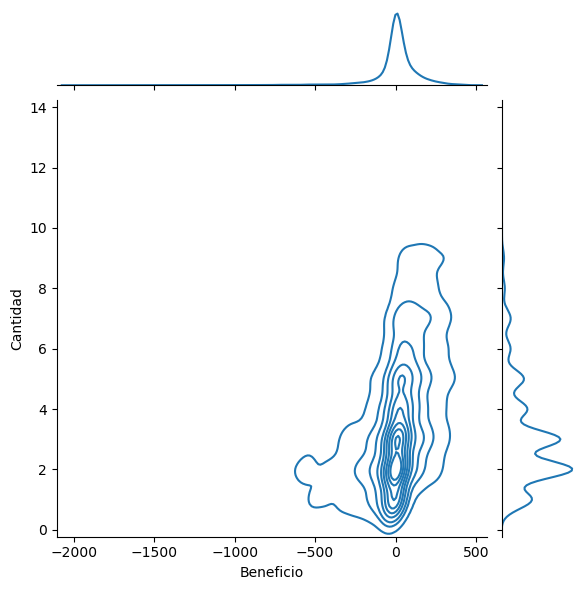

In [16]:
sns.jointplot(x='Beneficio', y='Cantidad', data=df_global_rpc[df_global_rpc['Importe'] < 500.00], kind='kde')

<Axes: >

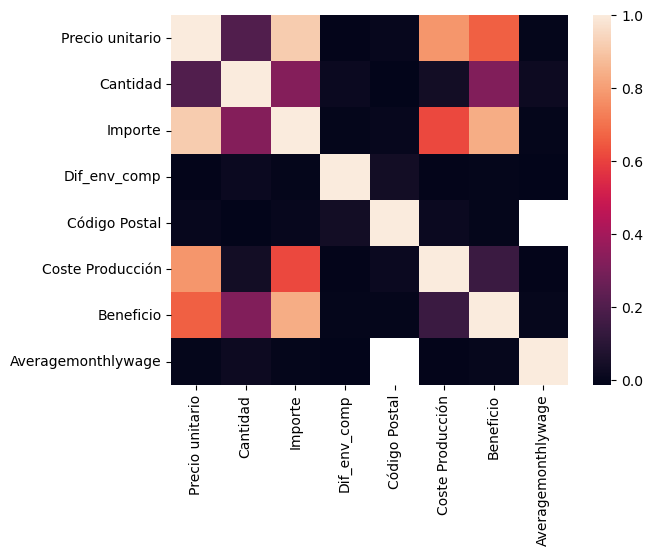

In [17]:
# 6
corr_df = df_global_rpc.corr(numeric_only=True)
sns.heatmap(corr_df, xticklabels = corr_df.columns.values, yticklabels = corr_df.columns.values)

C:\Users\nlazareva\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


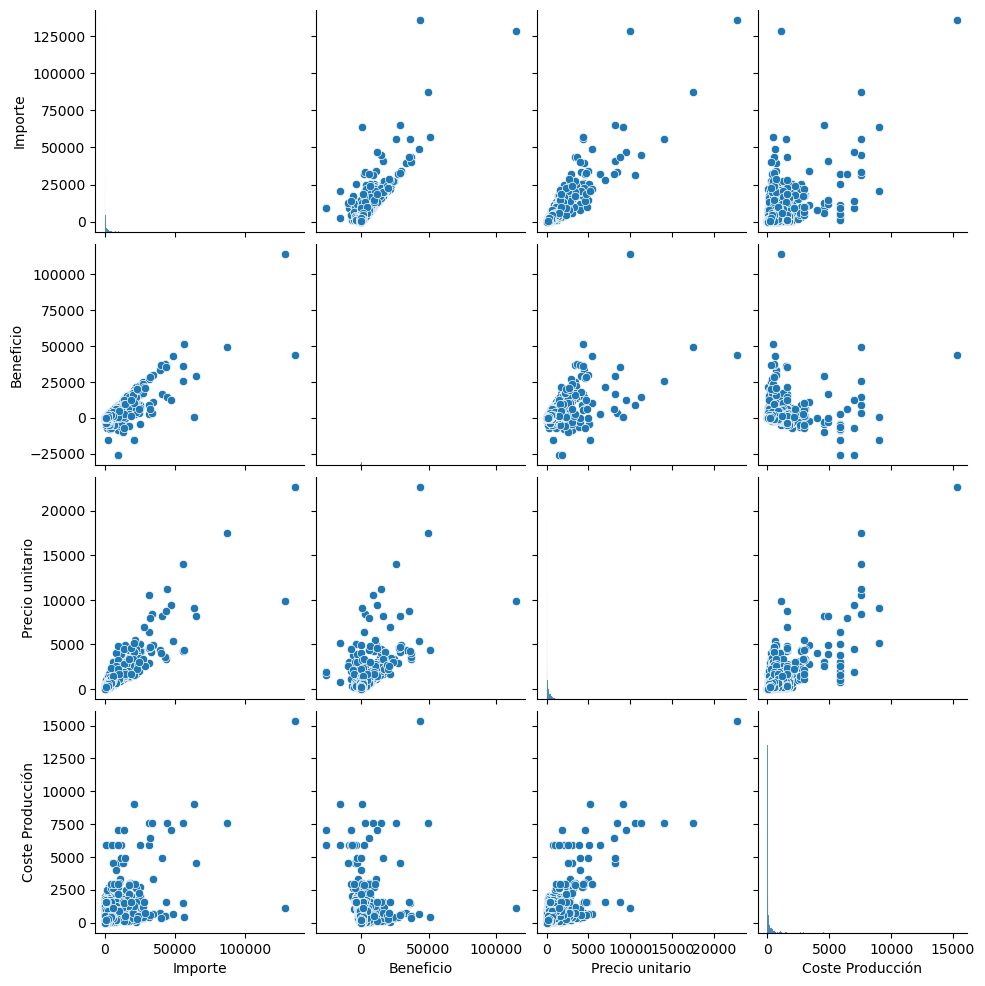

In [19]:
# 7
sns.pairplot(df_global_rpc, vars=['Importe', 'Beneficio', 'Precio unitario', 'Coste Producción'])

# Entre Precio unitario y Coste de producción existe la relación lineal positiva: 
# a mayor nº de beneficio, mayor nº del importe de venta

# Entre Importe y Beneficio existe la relación lineal positiva: a mayor nº de beneficio, mayor nº del importe de venta

<Axes: xlabel='País'>

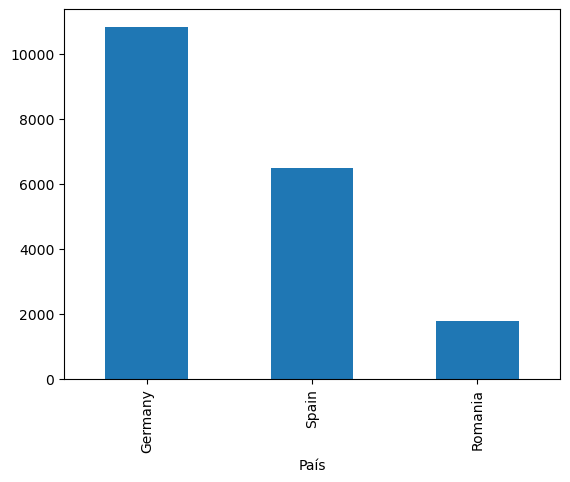

In [22]:
# 8
df_global_rpc.loc[df_global_rpc['País'] != 'United States'].groupby(['País'])['Cantidad'].agg('sum').sort_values(ascending=False).plot(kind='bar') 
# Alemania tiene mayor nº de ventas

In [40]:
# 9
df_2020 = df_global_rpc[(df_global_rpc['Fecha compra'] > '2020/01/01') & (df_global_rpc['Fecha compra'] < '2020/12/31')]
df_2020.head()

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad,Importe,Dif_env_comp,...,Ciudad,Estado,Código Postal,Región,Categoría,Sub-categoría,Nombre Producto,Coste Producción,Beneficio,Averagemonthlywage
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.960,2,523.920,3.208333,...,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,63.723687,4893
3,CA-2016-117681,2020-04-09,2020-04-14 00:00:00,Standard Class,HF-14995,FUR-BO-10001798,556.665,5,2783.325,5.000000,...,NaN,NaN,NaN,NaN,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156,1632.834218,3478
4,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.940,3,2195.820,3.000000,...,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",563.102730,506.511811,4893
6,CA-2016-114489,2020-12-05,2020-12-09 00:00:00,Standard Class,JE-16165,FUR-CH-10000454,1951.840,8,15614.720,4.000000,...,Franklin,Wisconsin,53132.0,Central,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",563.102730,11109.898162,4893
8,CA-2016-120530,2020-04-07,2020-04-12 00:00:00,Standard Class,Dl-13600,FUR-CH-10000454,658.746,3,1976.238,5.000000,...,Pasadena,Texas,77506.0,Central,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",563.102730,286.929811,4893


<Axes: xlabel='Fecha compra'>

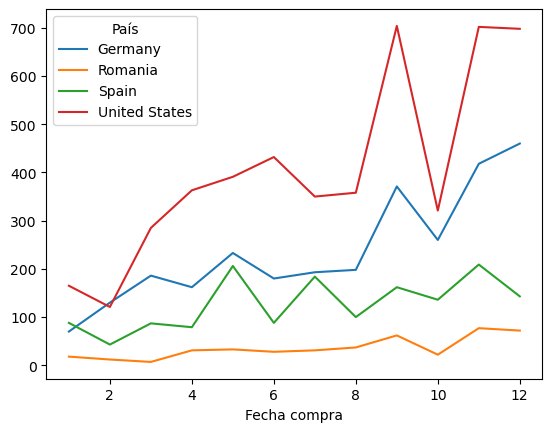

In [59]:
df_2020.groupby(["País", df_2020["Fecha compra"].map(lambda x: x.month)])['Cantidad'].agg('sum').unstack("País").plot()
# El mayor crecimiento han experimentado EEUU y Alemania, puesto que tienen la diferencia más grande entre suma de ventas 
# al principio y al final del año

<Axes: title={'center': 'Importe'}, xlabel='País'>

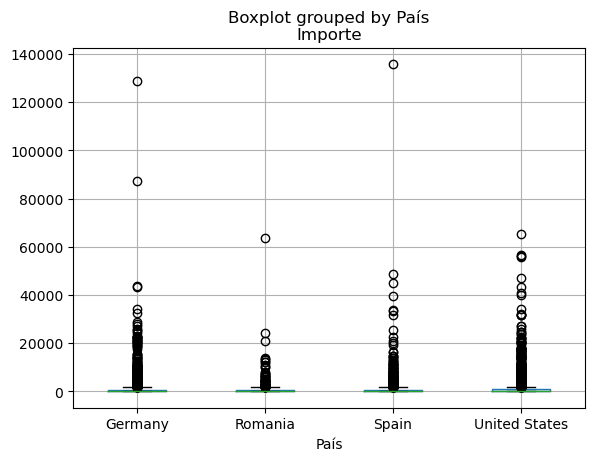

In [60]:
# 10
df_global_rpc.boxplot('Importe', by = 'País')
# España tiene el valor del importe más alto

In [70]:
print(df_global_rpc.loc[df_global_rpc['Importe'].idxmax(), 'País'], df_global_rpc.loc[df_global_rpc['Importe'].idxmax(), 'Importe'])

Spain 135830.88


<Axes: title={'center': 'Importe'}, xlabel='País'>

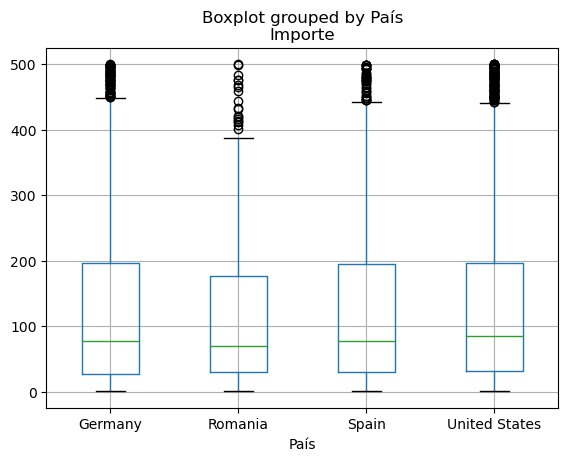

In [71]:
# 11
df_global_rpc[df_global_rpc['Importe'] < 500.00].boxplot('Importe', by='País')
# 25% - al comparar las líneas inferiores de las cajas, observamos que no hay difrencias significativas
# 50% - al comparar las lineas medianas, podemos ordenar las variables de mayor número medio de ventas a menor como:
# EEUU, Alemania, España, Rumanía. Sin embargo, las diferencias son pequeñas
# 75 % - Ahí sí se observan als diferencias más significativas que en dos casos anteriores: dos países con la mayor
# dispersión son Alemania y EEUU, España está un poco por debajo, y, por último, está Rumanía

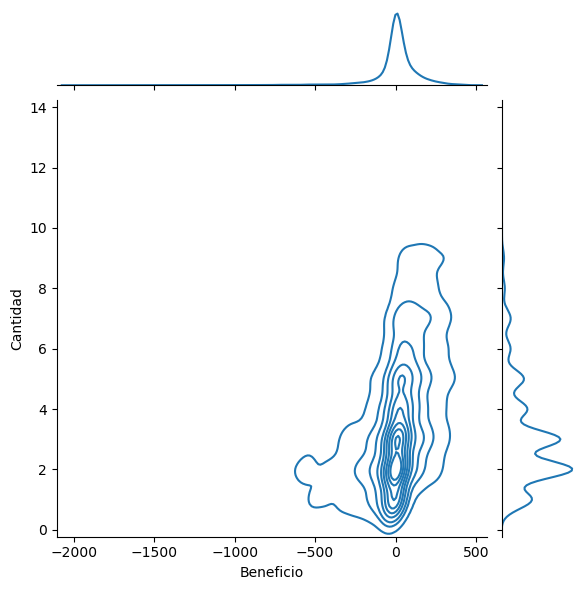

In [72]:
# 12
sns.jointplot(x='Beneficio', y='Cantidad', data=df_global_rpc[df_global_rpc['Importe'] < 500.00], kind='kde')
# El valor de Cantidad con mayor probabilidad es 2, ya que tiene el pico más alto
# La distribución de Beneficio  sigue una Normal

<Axes: >

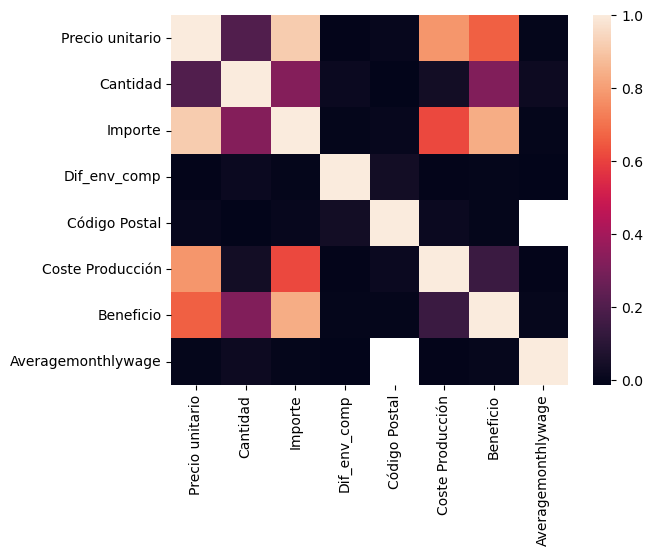

In [73]:
# 13
sns.heatmap(corr_df, xticklabels = corr_df.columns.values, yticklabels = corr_df.columns.values)
# ¿de qué depende mayoritariamente el beneficio de nuestra compañía?: Del Importe y Precio Unitario

# ¿Qué conclusiones sacas acerca del modelo de negocio de la empresa?: a medida que aumenta el beneficio, 
# también tiende a aumentar el coste de producción, lo que podría indicar que la empresa está incurriendo 
# en mayores costes para obtener mayores beneficios. Existe una correlación positiva entre el precio unitario 
# y el beneficio. Esto podría indicar que la empresa obtiene mayores beneficios al vender productos a precios 
# unitarios más altos. Hay una correlación positiva entre la diferencia entre el precio de venta 
# y el de compra y el beneficio. Esto sugiere que mayores diferencias entre el precio de venta y el de compra 
# están asociadas con mayores beneficios para la empresa. En conclusión, para obtener mayores beneficios, la empresa
# aumenta costes de producción, vende productos a precios unitarios más altos, intenta aumentar la diferencia entre
# el precio de venta y el precio de compra, y vender mayores cantidades de productos. 

# ¿está impactando el salario medio del país de nuestro cliente en alguna de nuestras variables?: El código postal y el
# salario medio están muy correlacionadas, o sea, el salario medio depende de la provincia

In [ ]:
# 13